# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [3]:
%pip install scikit-image


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -----------------

In [4]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

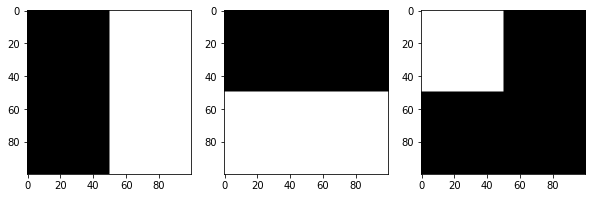

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


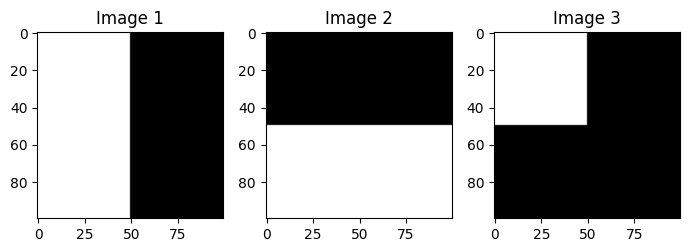

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt

# Create the first image (imag1)
imag1 = np.zeros((100, 100))  
imag1[:, :50] = 1.0  

# Create the second image (image2)
imag2 = np.zeros((100, 100))  
imag2[50:, :] = 1.0  

# Create the therd image (image)
image = np.zeros((100, 100))  
image[:50, :50] = 1.0  

fig, axes = plt.subplots(1, 3, figsize=(7, 10))  

# Display imag1
axes[0].imshow(imag1, cmap='gray', vmin=0, vmax=1)
axes[0].set_title("Image 1")
axes[0].axis('on')  

# Display imag1
axes[1].imshow(imag2, cmap='gray', vmin=0, vmax=1)
axes[1].set_title("Image 2")
axes[1].axis('on') 

# Display image
axes[2].imshow(image, cmap='gray', vmin=0, vmax=1)
axes[2].set_title("Image 3")
axes[2].axis('on')  

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

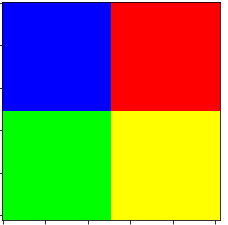
*Hint: Remember channels and color spaces*

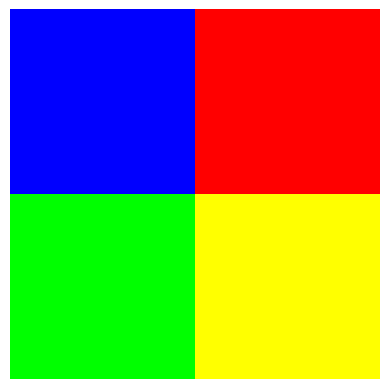

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt

# Create a 100x100 image with 3 channels (RGB)
image = np.zeros((100, 100, 3))

# Top-left quadrant: Blue (0, 0, 1)
image[:50, :50, 2] = 1.0  # Set Blue channel to 1.0

# Top-right quadrant: Red (1, 0, 0)
image[:50, 50:, 0] = 1.0  # Set Red channel to 1.0

# Bottom-left quadrant: Green (0, 1, 0)
image[50:, :50, 1] = 1.0  # Set Green channel to 1.0

# Bottom-right quadrant: Yellow (1, 1, 0)
image[50:, 50:, 0] = 1.0  # Set Red channel to 1.0
image[50:, 50:, 1] = 1.0  # Set Green channel to 1.0

# Display the image
plt.imshow(image)
plt.axis('off')  
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

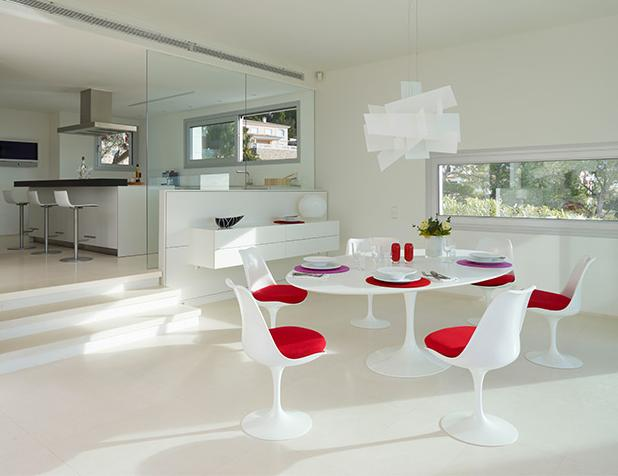

*   Extract individual channels and plot them using matplotlib subplot.



<class 'numpy.ndarray'>


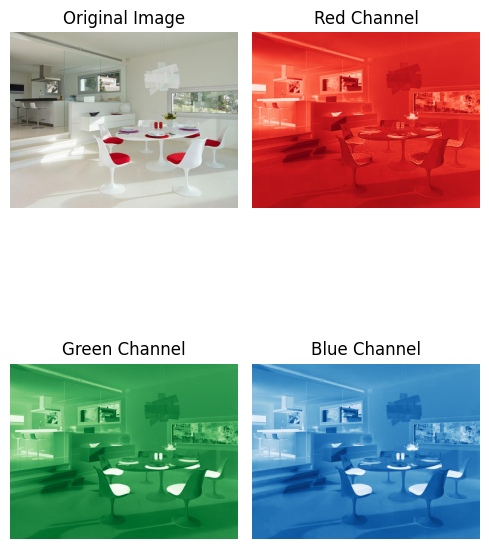

In [48]:
# solution
from PIL import Image
from numpy import asarray


# Use a raw string for the file path
image = Image.open(r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\sillas.jpg")
# convert image to numpy array
image_array = asarray(image)
print(type(data))

# Extract individual channels
red_channel = image_array[:, :, 0]  # Red channel
green_channel = image_array[:, :, 1]  # Green channel
blue_channel = image_array[:, :, 2]  # Blue channel

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(5, 8))

# Display the original image
axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the Red channel
red_channel = image_array[:, :, 0]  # Red channel

axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title("Red Channel")
axes[0, 1].axis('off')

# Display the Green channel
axes[1, 0].imshow(green_channel, cmap='Greens')
axes[1, 0].set_title("Green Channel")
axes[1, 0].axis('off')

# Display the Blue channel
axes[1, 1].imshow(blue_channel, cmap='Blues')
axes[1, 1].set_title("Blue Channel")
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

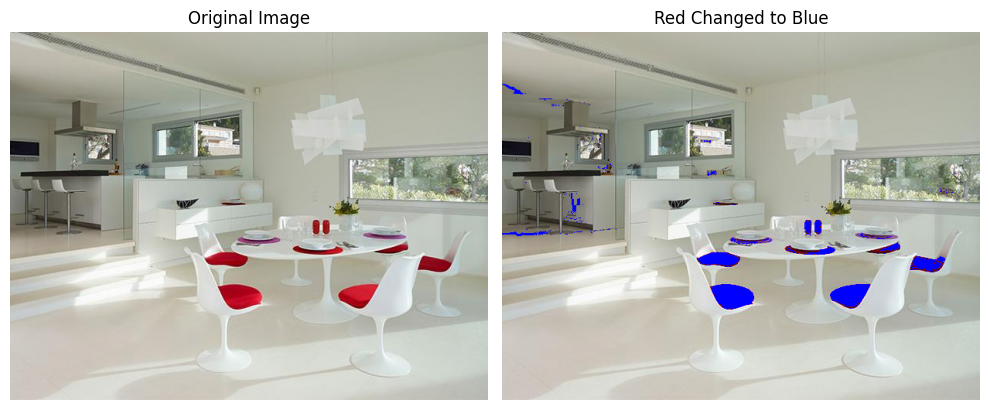

In [52]:

image_array = image_array / 255.0

# Define a threshold for identifying red pixels
red_threshold = 0.5  # Adjust this value as needed

# Create a mask for red pixels
red_mask = (
    (image_array[:, :, 0] > red_threshold) &  # Red channel is high
    (image_array[:, :, 1] < red_threshold) &  # Green channel is low
    (image_array[:, :, 2] < red_threshold) )   # Blue channel is low

# Create a copy of the original image
modified_image = image_array.copy()

# Replace red with blue
modified_image[red_mask] = [0, 0, 1]  # Set RGB to [0, 0, 1] (blue)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the modified image
axes[1].imshow(modified_image)
axes[1].set_title("Red Changed to Blue")
axes[1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

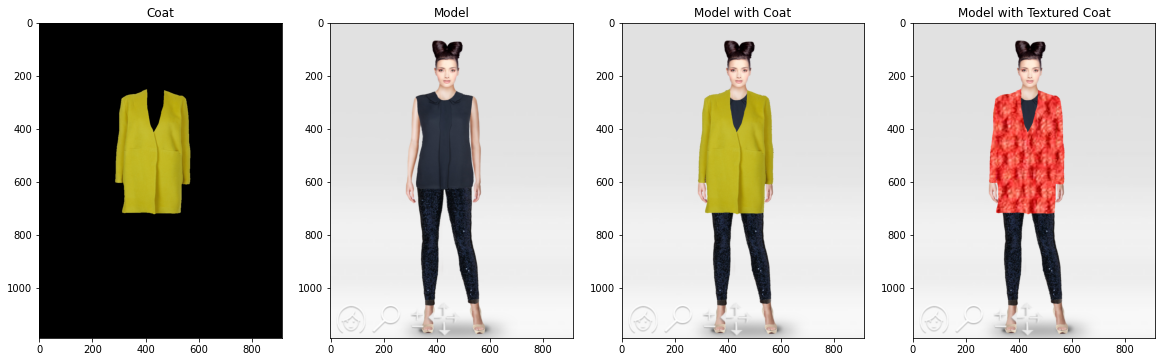

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the images
model = Image.open(r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\model.png").convert("RGBA")  # Ensure transparency is preserved
coat = Image.open(r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\coat.png").convert("RGBA")
texture = Image.open(r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\texture3.jpg").convert("RGB")  # JPEG has no alpha channel


# Resize coat and texture to match the model
coat = coat.resize(model.size, Image.Resampling.LANCZOS)
texture = texture.resize(coat.size, Image.Resampling.LANCZOS)

# Convert images to numpy arrays
model_np = np.array(model)
coat_np = np.array(coat)
texture_np = np.array(texture)

# Create a binary mask from the coat (where alpha > 0)
mask = coat_np[:, :, 3] > 0

# Apply texture to the coat
textured_coat_np = np.zeros_like(coat_np)
textured_coat_np[mask] = np.concatenate([texture_np[mask], np.full((mask.sum(), 1), 255)], axis=1)

# Combine model and textured coat
final_model_np = np.where(mask[:, :, None], textured_coat_np, model_np)

# Convert back to Image
final_model = Image.fromarray(final_model_np.astype('uint8'), 'RGBA')

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title('Model')
plt.imshow(model)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Coat')
plt.imshow(coat)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Textured Coat')
plt.imshow(Image.fromarray(textured_coat_np.astype('uint8'), 'RGBA'))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Final Model')
plt.imshow(final_model)
plt.axis('off')

plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




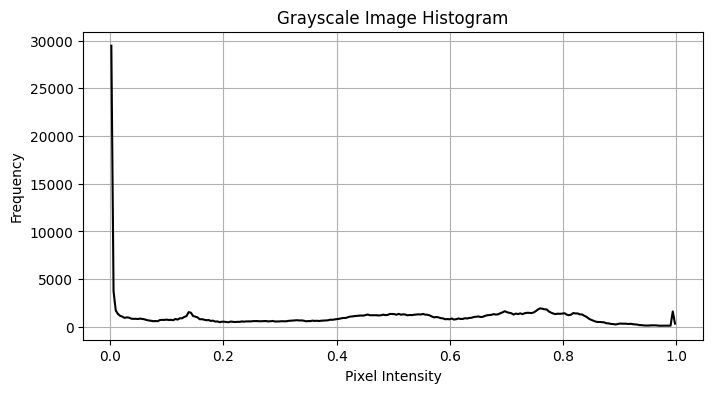

In [1]:
# solution

from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Load the astronaut image
astronaut = data.astronaut()

# Convert the image to grayscale
gray_astronaut = color.rgb2gray(astronaut)

# Compute the histogram of the grayscale image
hist, bin_centers = exposure.histogram(gray_astronaut)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

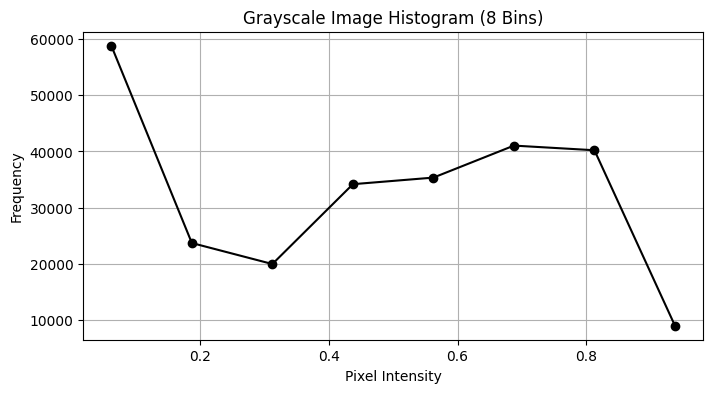

In [ ]:
# solution
from skimage import data, color, exposure

# Load the astronaut image
astronaut = data.astronaut()

# Convert the image to grayscale
gray_astronaut = color.rgb2gray(astronaut)

# Compute the histogram of the grayscale image with 8 bins
hist, bin_centers = exposure.histogram(gray_astronaut, nbins=8)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, hist, color='black', marker='o', linestyle='-')
plt.title("Grayscale Image Histogram (8 Bins)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Yes, inference can change based on the bin count:

Low Bin Count:

You might miss important details in the intensity distribution.

High Bin Count:

You might see too much detail, including noise or insignificant variations in intensity.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


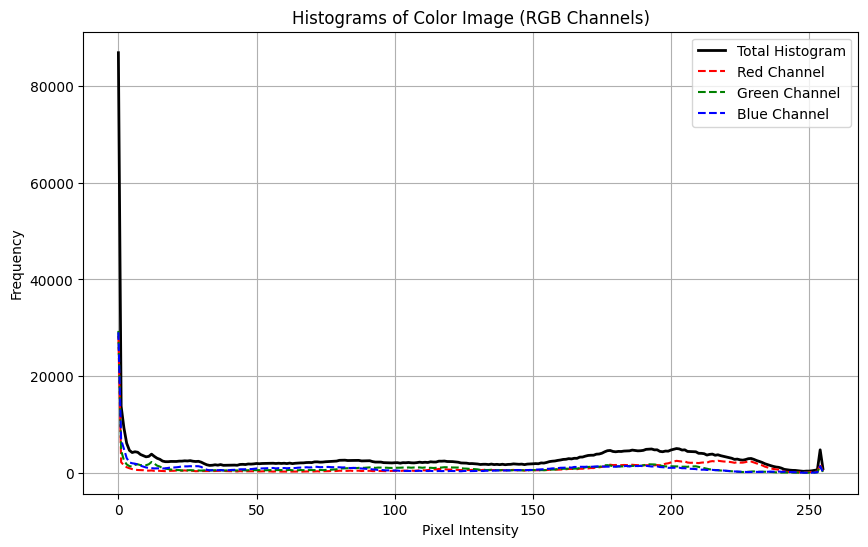

In [6]:
#solution
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

# Load the astronaut image (color)
astronaut = data.astronaut()

# Compute histograms for each channel
hist_r, bin_centers_r = exposure.histogram(astronaut[:, :, 0], nbins=256)  # Red channel
hist_g, bin_centers_g = exposure.histogram(astronaut[:, :, 1], nbins=256)  # Green channel
hist_b, bin_centers_b = exposure.histogram(astronaut[:, :, 2], nbins=256)  # Blue channel

# Compute the total histogram (sum of R, G, B histograms)
hist_total = hist_r + hist_g + hist_b

# Plot the histograms
plt.figure(figsize=(10, 6))

# Plot the total histogram
plt.plot(bin_centers_r, hist_total, color='black', label='Total Histogram', linestyle='-', linewidth=2)

# Plot the individual channel histograms
plt.plot(bin_centers_r, hist_r, color='red', label='Red Channel', linestyle='--')
plt.plot(bin_centers_g, hist_g, color='green', label='Green Channel', linestyle='--')
plt.plot(bin_centers_b, hist_b, color='blue', label='Blue Channel', linestyle='--')

# Add labels, title, and legend
plt.title("Histograms of Color Image (RGB Channels)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



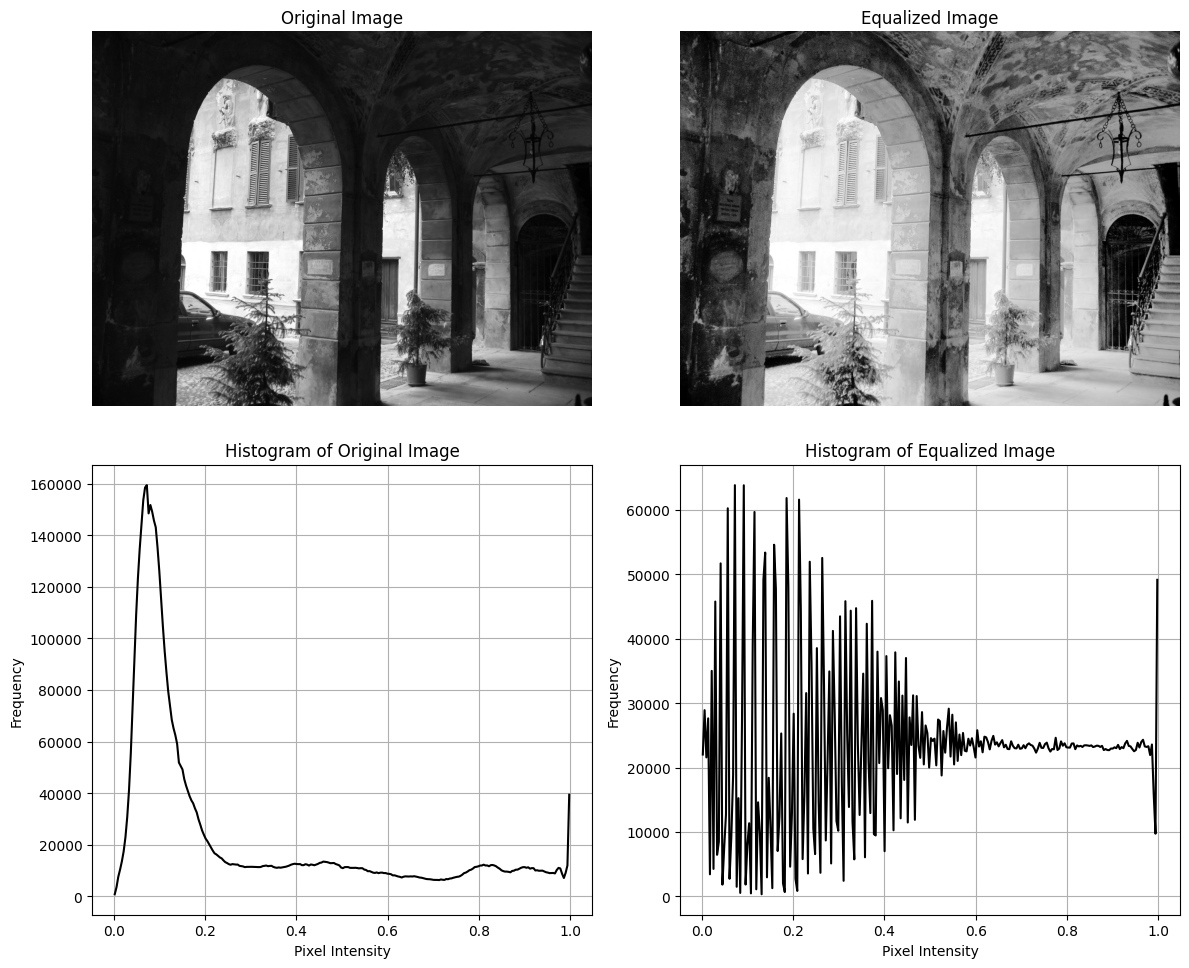

In [7]:
# solution
from skimage import io, exposure
import matplotlib.pyplot as plt

# Load the low-contrast image
image_path = r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\aquatermi_lowcontrast.jpg"
image = io.imread(image_path, as_gray=True)  # Load as grayscale

# Compute the histogram of the original image
hist_original, bin_centers_original = exposure.histogram(image, nbins=256)

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_equalized, bin_centers_equalized = exposure.histogram(image_equalized, nbins=256)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the equalized image
axes[0, 1].imshow(image_equalized, cmap='gray')
axes[0, 1].set_title("Equalized Image")
axes[0, 1].axis('off')

# Plot the histogram of the original image
axes[1, 0].plot(bin_centers_original, hist_original, color='black')
axes[1, 0].set_title("Histogram of Original Image")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].grid(True)

# Plot the histogram of the equalized image
axes[1, 1].plot(bin_centers_equalized, hist_equalized, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization: Non-linear, adaptive, and enhances local contrast.

Linear Contrast Stretch: Linear, global, and simpler but less adaptive.
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



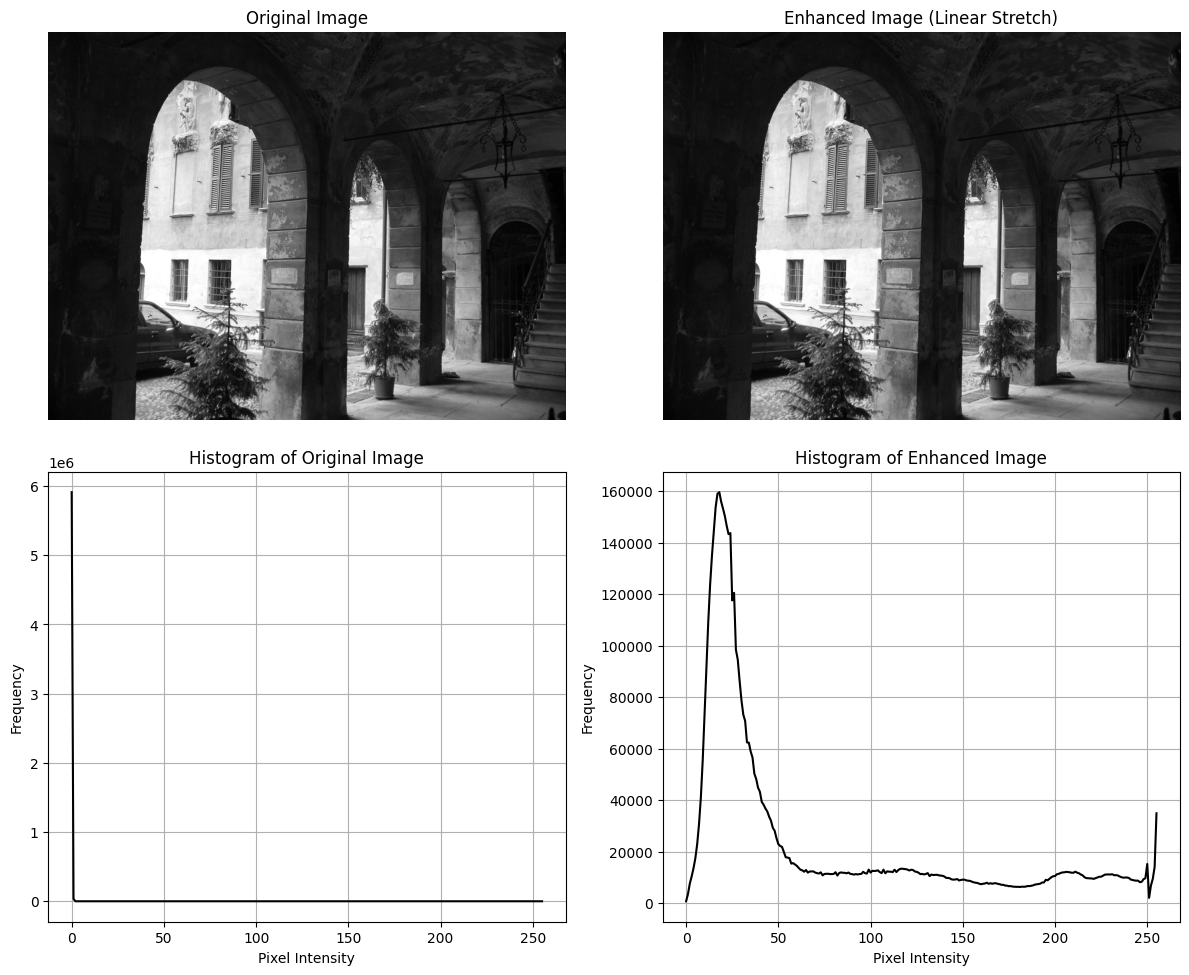

In [9]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def linear_contrast_stretch(image, bin_count=256):
    """
    Perform linear contrast stretch on a grayscale image.
    
    Parameters:
        image (numpy.ndarray): Grayscale image array.
        bin_count (int): Number of bins for the histogram.
    
    Returns:
        numpy.ndarray: Enhanced image after linear contrast stretch.
    """
    # Find the minimum and maximum intensity values
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Perform linear contrast stretch
    enhanced_image = (image - min_val) * (255 / (max_val - min_val))
    enhanced_image = np.clip(enhanced_image, 0, 255)  # Ensure values are within [0, 255]
    
    return enhanced_image.astype(np.uint8)

# Load the grayscale image
image_path = r"C:\Users\NOURA\Desktop\ironhack\week3\day3\lab-computer-vision\images\aquatermi_lowcontrast.jpg"
image = io.imread(image_path, as_gray=True)  # Load as grayscale

# Perform linear contrast stretch
enhanced_image = linear_contrast_stretch(image)

# Compute histograms
hist_original, bin_edges_original = np.histogram(image, bins=256, range=(0, 256))
hist_enhanced, bin_edges_enhanced = np.histogram(enhanced_image, bins=256, range=(0, 256))

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the enhanced image
axes[0, 1].imshow(enhanced_image, cmap='gray')
axes[0, 1].set_title("Enhanced Image (Linear Stretch)")
axes[0, 1].axis('off')

# Plot the histogram of the original image
axes[1, 0].plot(bin_edges_original[:-1], hist_original, color='black')
axes[1, 0].set_title("Histogram of Original Image")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].grid(True)

# Plot the histogram of the enhanced image
axes[1, 1].plot(bin_edges_enhanced[:-1], hist_enhanced, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




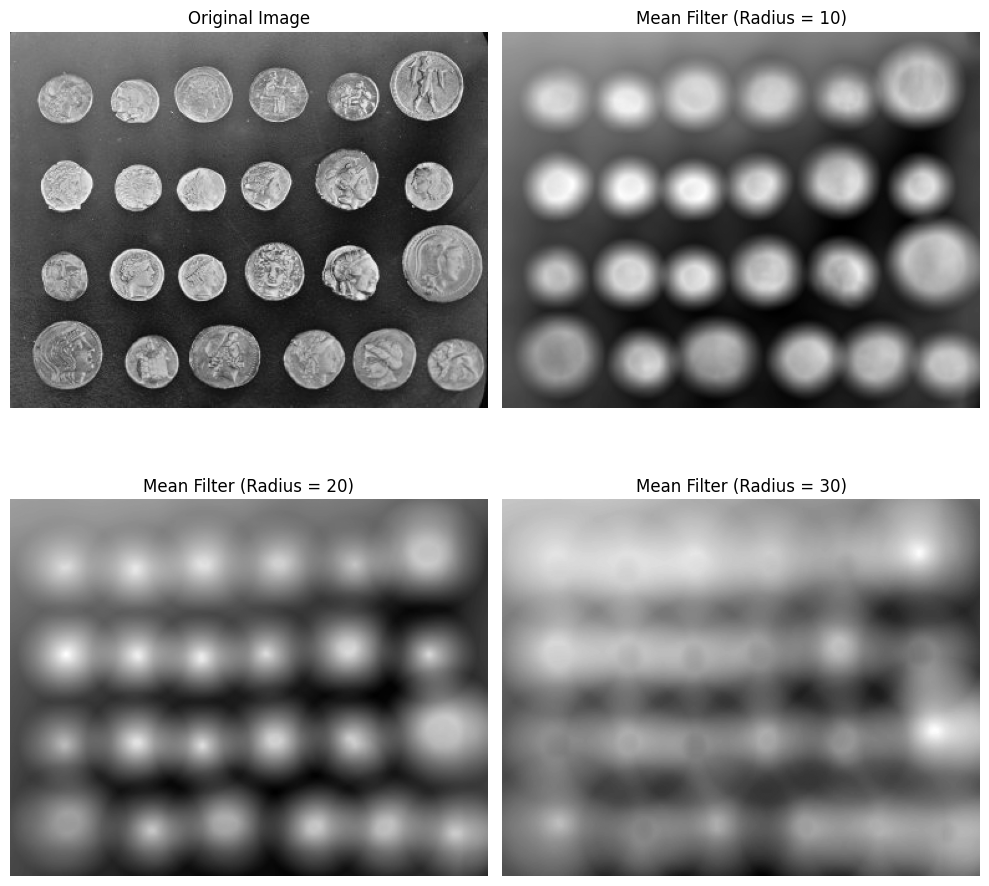

In [10]:
# solution
from skimage import data, filters, morphology

# Load the coins image
image = data.coins()

# Define a disk structuring element with radius 20
selem_20 = morphology.disk(20)

# Apply the mean filter with radius 20
mean_filtered_20 = filters.rank.mean(image, selem_20)

# Increase the radius by 10 (radius = 30)
selem_30 = morphology.disk(30)
mean_filtered_30 = filters.rank.mean(image, selem_30)

# Decrease the radius by 10 (radius = 10)
selem_10 = morphology.disk(10)
mean_filtered_10 = filters.rank.mean(image, selem_10)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the image filtered with radius 10
axes[0, 1].imshow(mean_filtered_10, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius = 10)")
axes[0, 1].axis('off')

# Display the image filtered with radius 20
axes[1, 0].imshow(mean_filtered_20, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius = 20)")
axes[1, 0].axis('off')

# Display the image filtered with radius 30
axes[1, 1].imshow(mean_filtered_30, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius = 30)")
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\NOURA\AppData\Local\Temp\ipykernel_9444\1583618913.py:10: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = morphology.square(20)  # Square with side length 20
C:\Users\NOURA\AppData\Local\Temp\ipykernel_9444\1583618913.py:11: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = morphology.rectangle(15, 25)  # Rectangle with width 15 and height 25


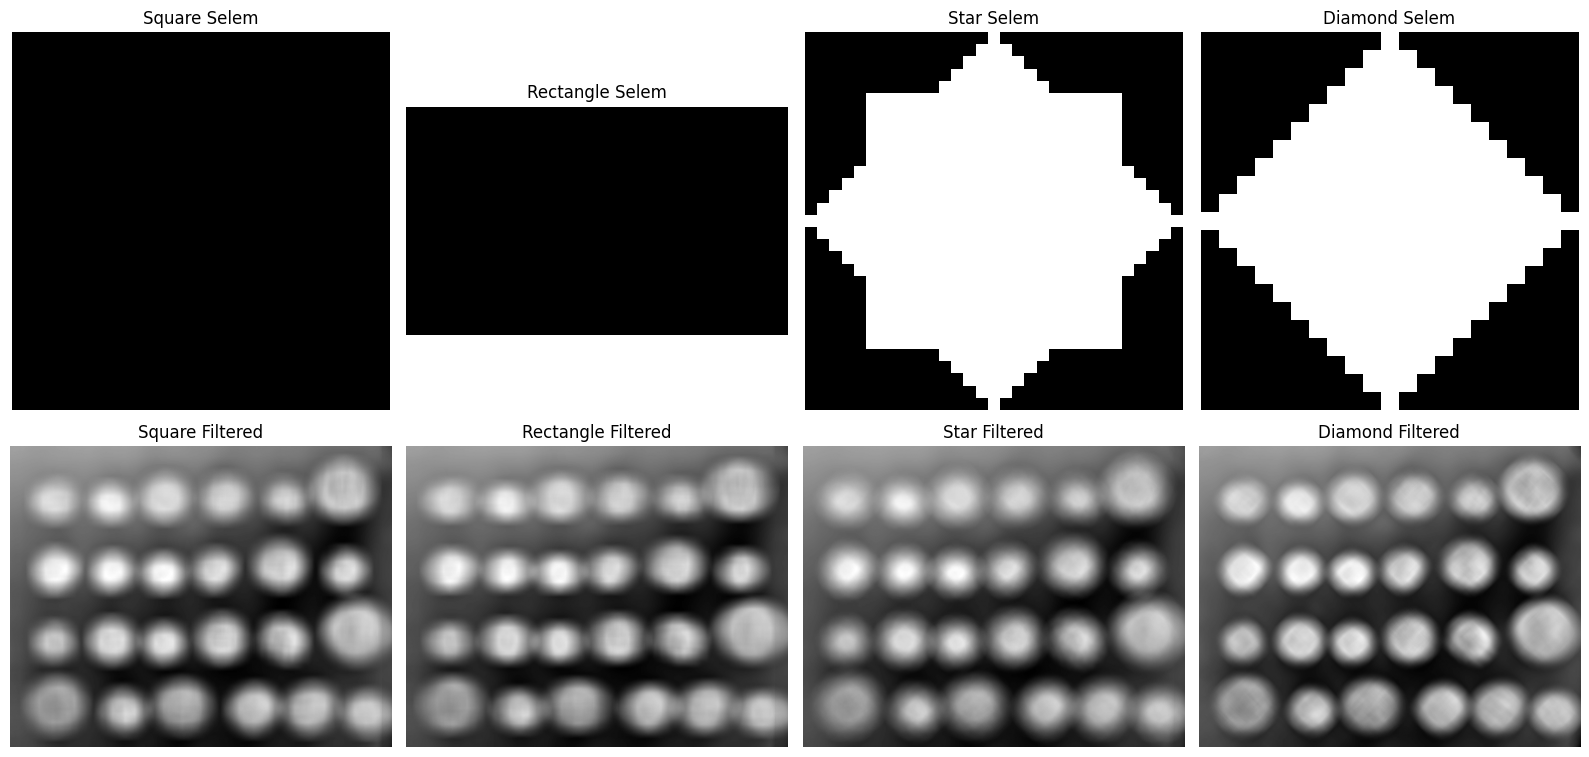

In [ ]:
# solution

# Load the coins image
image = data.coins()

# Define different structuring elements
selem_square = morphology.square(20)  # Square with side length 20
selem_rectangle = morphology.rectangle(15, 25)  # Rectangle with width 15 and height 25
selem_star = morphology.star(10)  # Star with radius 10
selem_diamond = morphology.diamond(10)  # Diamond with radius 10

# Apply the mean filter with each structuring element
mean_filtered_square = filters.rank.mean(image, selem_square)
mean_filtered_rectangle = filters.rank.mean(image, selem_rectangle)
mean_filtered_star = filters.rank.mean(image, selem_star)
mean_filtered_diamond = filters.rank.mean(image, selem_diamond)

# Create a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Display the structuring elements in the first row
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square Selem")
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle Selem")
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star Selem")
axes[0, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond Selem")
axes[0, 3].axis('off')

# Display the corresponding smoothed images in the second row
axes[1, 0].imshow(mean_filtered_square, cmap='gray')
axes[1, 0].set_title("Square Filtered")
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_filtered_rectangle, cmap='gray')
axes[1, 1].set_title("Rectangle Filtered")
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_filtered_star, cmap='gray')
axes[1, 2].set_title("Star Filtered")
axes[1, 2].axis('off')

axes[1, 3].imshow(mean_filtered_diamond, cmap='gray')
axes[1, 3].set_title("Diamond Filtered")
axes[1, 3].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Small Radius: Preserves details, less smoothing.

Large Radius: Blurs details, more smoothing.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Square/Rectangle:

Smoothing is uniform (square) or directional (rectangle), depending on the shape.

Star:

Smoothing is non-uniform, with more emphasis on the star's arms.

Diamond:

Smoothing is uniform but has a diamond-shaped influence.

Disk:

Smoothing is isotropic (uniform in all directions)
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean Filter:

Computes the average of pixel values in a neighborhood defined by the structuring element.

Effect: Produces uniform smoothing but can blur edges and details.

Gaussian Filter:

Computes a weighted average of pixel values, with weights defined by a Gaussian function.

Effect: Produces smoother results while better preserving edges and details.
...
Mean Filter:

Use when you need simple and fast smoothing.

Not ideal for preserving edges or fine details.

Gaussian Filter:

Use when you need smoothing while preserving edges.

Suitable for noise reduction in images with Gaussian noise.